## Продолжим?

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

In [3]:
mpg.head()

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

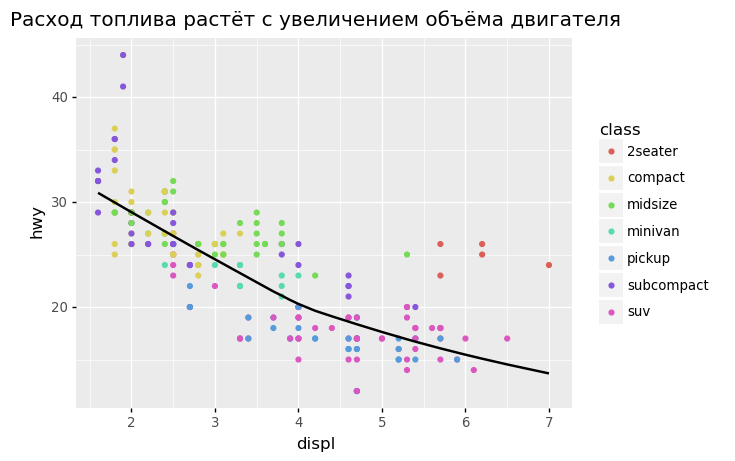

<ggplot: (122117939207)>

In [5]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

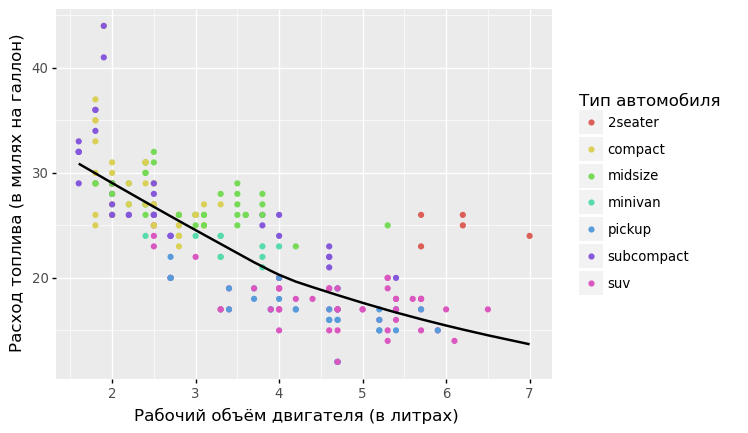

<ggplot: (122117969360)>

In [6]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

## Можно даже добавить математическое выражение вместо текстовых строк с помощью LaTeX:

In [ ]:
# !pip install latex

In [13]:
from matplotlib import rc
rc('text', usetex=True)

In [14]:
from matplotlib import rc
rc('text', usetex=True)

df = pd.DataFrame({"x": np.random.uniform(size=10),
                   "y": np.random.uniform(size=10)})

ggplot(df, aes("x", "y")) +\
geom_point() +\
labs(x="$\\sum_{i = 1}^n{x_i^2}$",
     y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>

<ggplot: (122117941182)>

## Не забудьте потом отключить эту опцию.

In [15]:
rc('text', usetex=False)

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

c:\users\aleksandr_fida\appdata\local\programs\python\python38\lib\site-packages\plotnine\stats\stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.


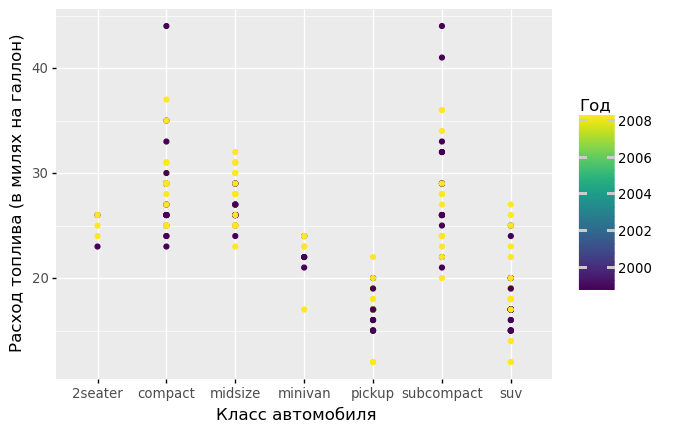

<ggplot: (176005815824)>

In [4]:
ggplot(mpg, aes("class", "hwy")) +\
geom_point(aes(colour="year")) +\
geom_smooth(se=False) +\
labs(x="Класс автомобиля",
     y="Расход топлива (в милях на галлон)",
     colour="Год")

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

In [5]:
cars = pd.read_csv('../data/car data.csv')
cars.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

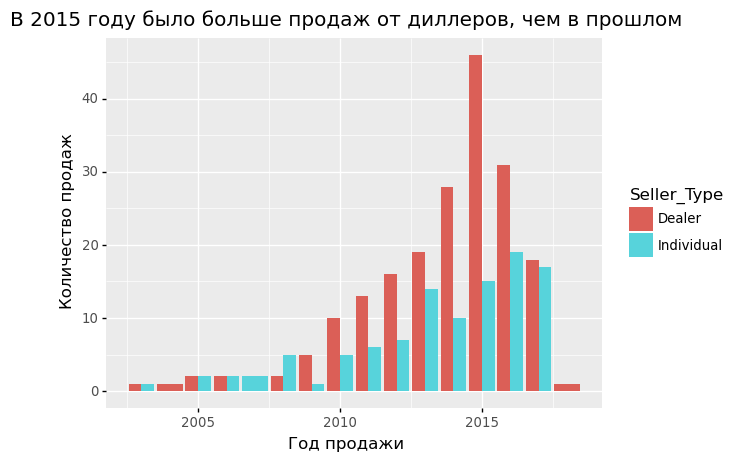

<ggplot: (176005960156)>

In [8]:
ggplot(data=cars) +\
geom_bar(mapping=aes(x="Year", fill="Seller_Type"), position="dodge") +\
labs(title="В 2015 году было больше продаж от диллеров, чем в прошлом",
     x="Год продажи",
     y="Количество продаж")

## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

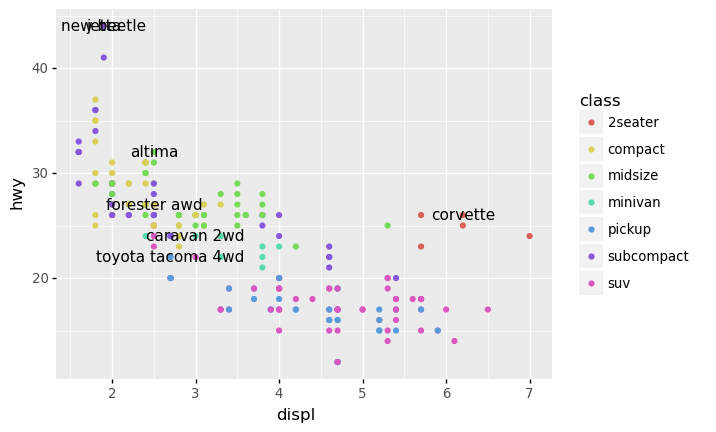

<ggplot: (142640759920)>

In [5]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

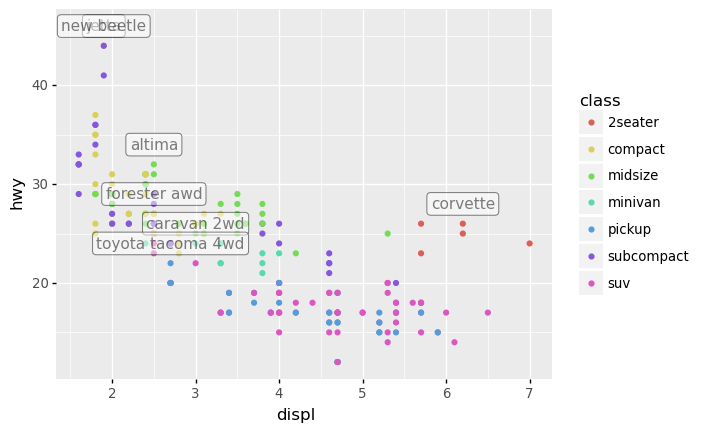

<ggplot: (142640696908)>

In [6]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

In [16]:
# !pip install adjustText

You should consider upgrading via the 'python -m pip install --upgrade pip' command.



    Running setup.py install for adjustText: started
    Running setup.py install for adjustText: finished with status 'done'


In [7]:
adjust_text_dict = {
    'expand_points': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '->'
    }
}

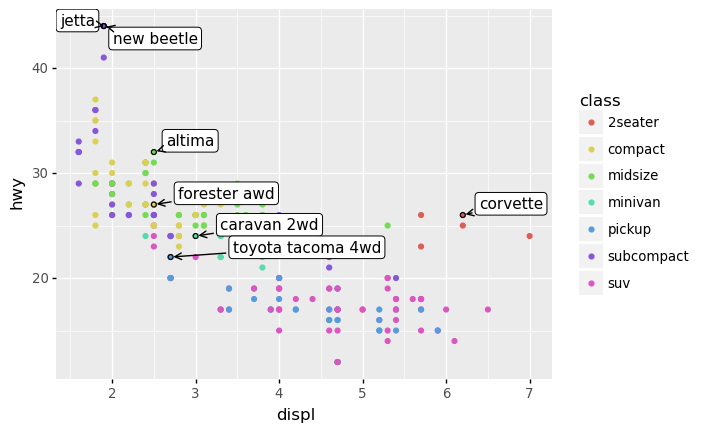

<ggplot: (142640726763)>

In [8]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class, adjust_text=adjust_text_dict)

## Обратите внимание, что мы нарисовали большие чёрные точки поверх выделенных.

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

<ipython-input-9-347a1b2fa085>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


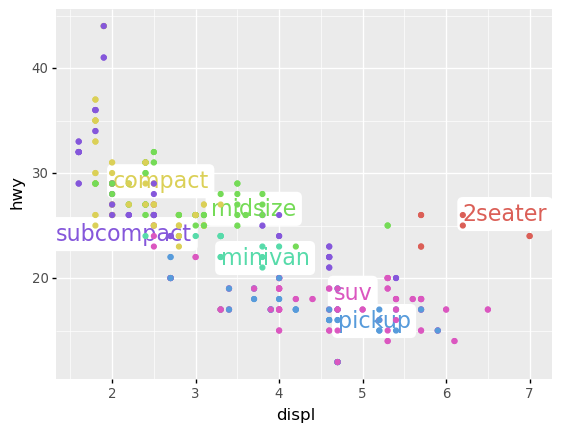

<ggplot: (142640961157)>

In [9]:
class_avg = mpg\
            .groupby("class")["displ","hwy"].median()\
            .reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
geom_point() +\
theme(legend_position="none")

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame. 

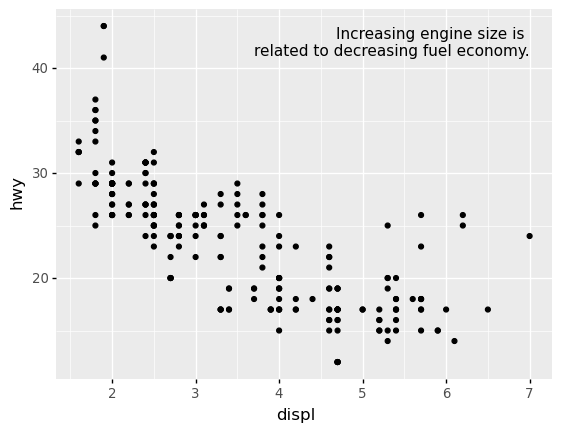

<ggplot: (142641600088)>

In [11]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовтаь `+np.Inf` и `-np.Inf`:

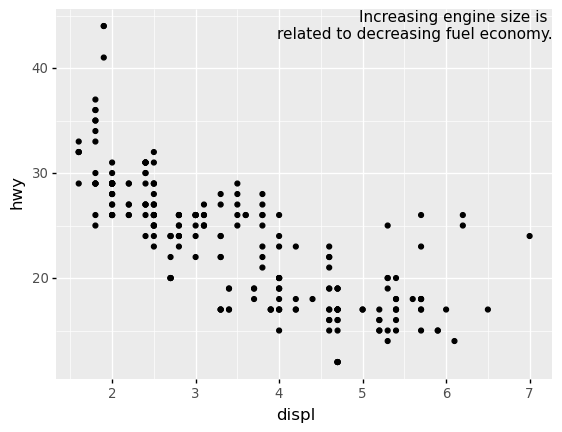

<ggplot: (142640731426)>

In [12]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [14]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

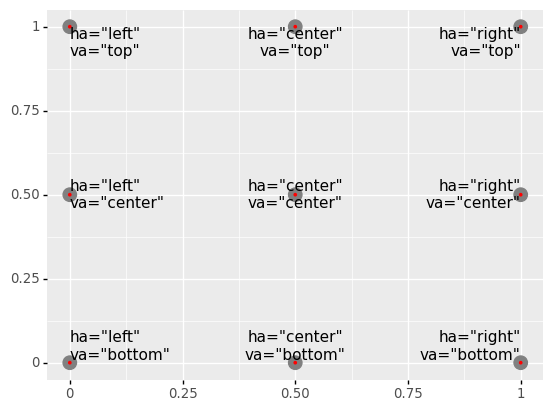

<ggplot: (142641364237)>

In [17]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

In [30]:
df

x    y     ha      va                    label
0 -inf -inf   left     top      ha="left"\nva="top"
1 -inf  inf   left  bottom   ha="left"\nva="bottom"
2  inf -inf  right     top     ha="right"\nva="top"
3  inf  inf  right  bottom  ha="right"\nva="bottom"

In [31]:
has = ["left", "right"]
vas = ["top", "bottom"]
xs = [-np.Inf, np.Inf]
ys = [-np.Inf, np.Inf]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(2), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

ValueError: Axis limits cannot be NaN or Inf

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

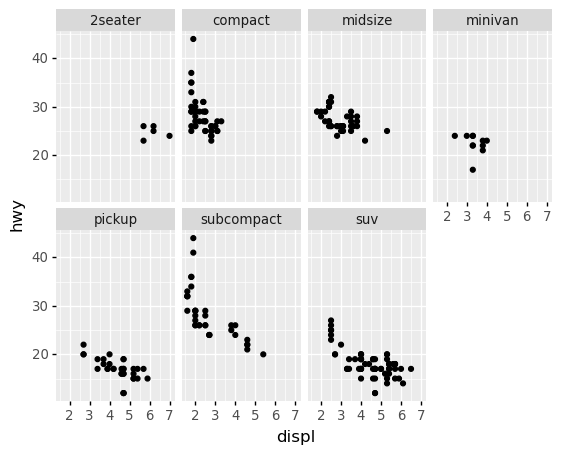

<ggplot: (142640734323)>

In [43]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

In [46]:
set(mpg['class'])

{'2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv'}

In [55]:
label

text       group  x   y
0  text     2seater  6  40
1   NaN      pickup  0   0
2   NaN     minivan  0   0
3   NaN     midsize  0   0
4   NaN  subcompact  0   0
5   NaN         suv  0   0
6   NaN     compact  0   0

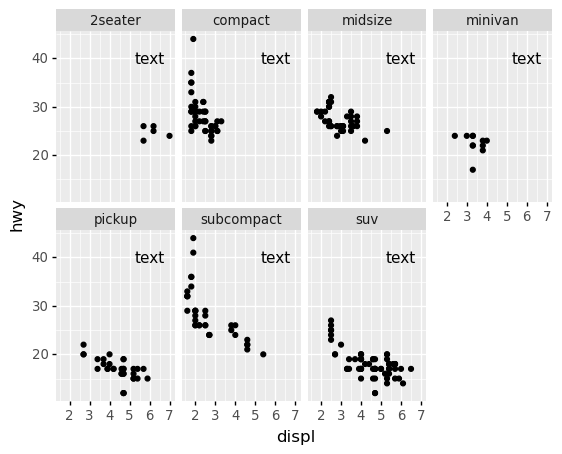

<ggplot: (142641666121)>

In [65]:
label = pd.DataFrame({
    "text": ["text"],
    "group": ['2seater'],
    "x": [6],
    "y": [40]
})

ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2) +\
geom_text(aes(x='x', y='y', label='text', group='group'), data=label)

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

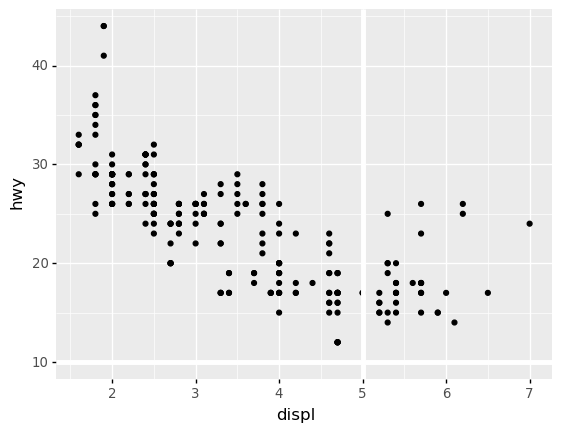

<ggplot: (142642257083)>

In [76]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
geom_hline(size=2, colour='white', yintercept=10) +\
geom_vline(size=2, colour='white', xintercept=5)

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

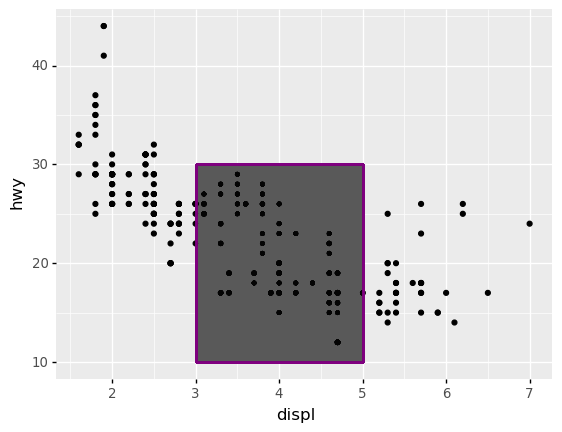

<ggplot: (142641639217)>

In [85]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
geom_rect(mapping=aes(xmin=3, xmax=5, ymin=10, ymax=30), color="purple", alpha=0.01)

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

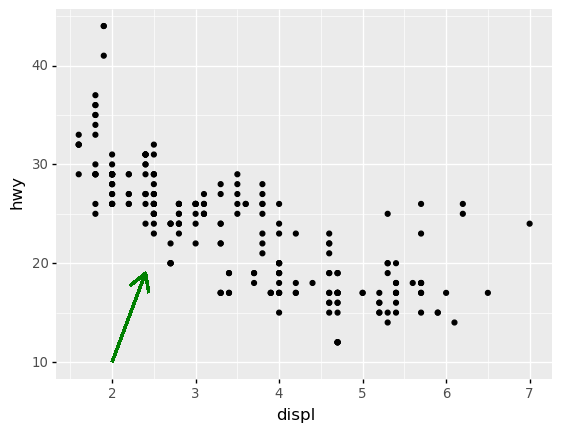

<ggplot: (142641892795)>

In [89]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
geom_segment(mapping=aes(x=2, y=10, xend=2.4, yend=19), arrow=arrow(), size=1, color="green")

## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

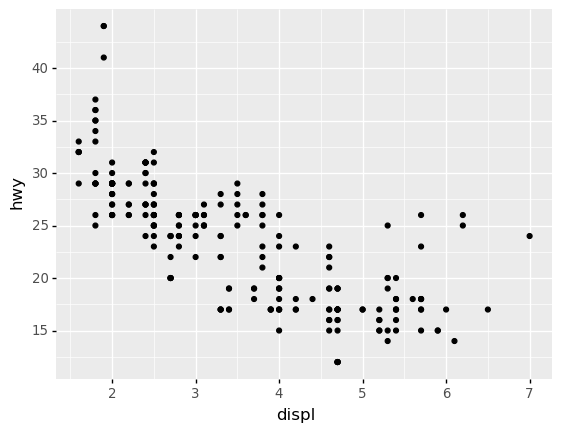

<ggplot: (142641007860)>

In [90]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

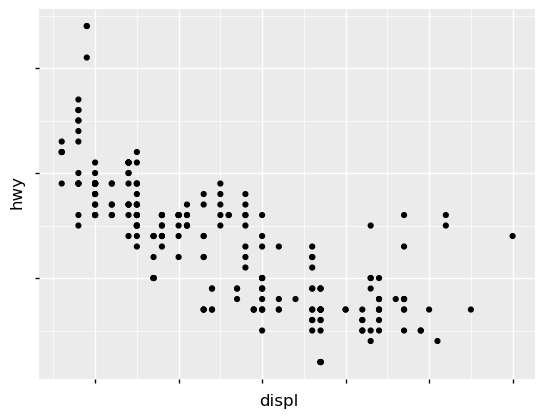

<ggplot: (142641527640)>

In [91]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

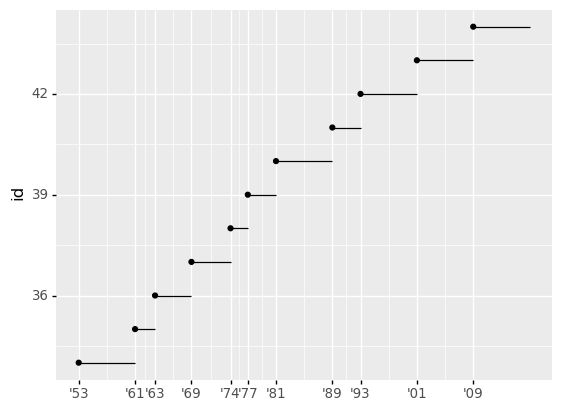

<ggplot: (142645525773)>

In [92]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [93]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

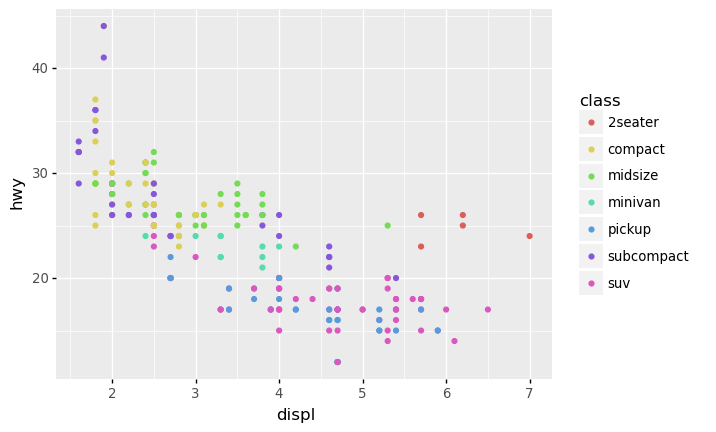

<ggplot: (142641037939)>

In [94]:
base + theme(legend_position="right")

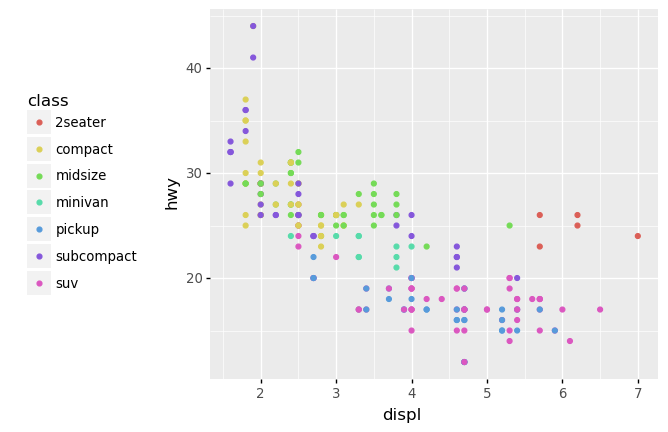

<ggplot: (142640637510)>

In [95]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

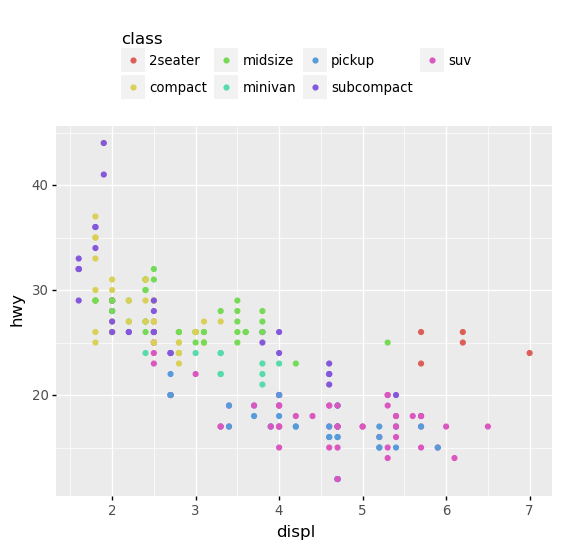

<ggplot: (142642303612)>

In [96]:
base + theme(legend_position="top")

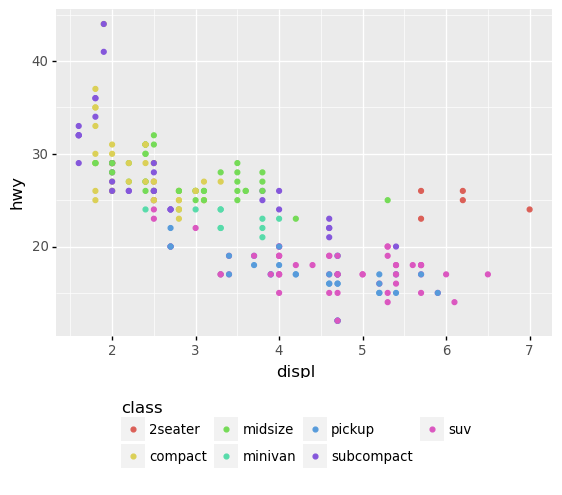

<ggplot: (142641431281)>

In [97]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

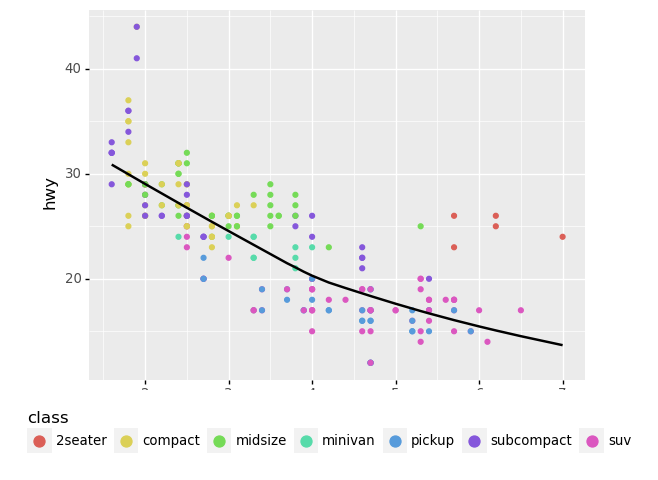

<ggplot: (142641029904)>

In [98]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

## Масштаб и шкала осей

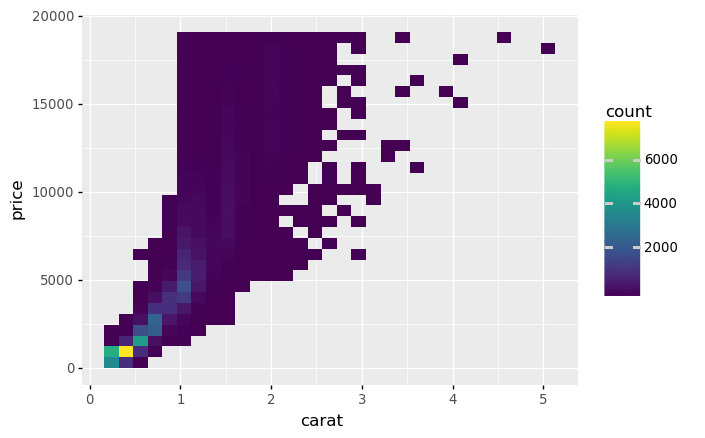

<ggplot: (142642126388)>

In [99]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

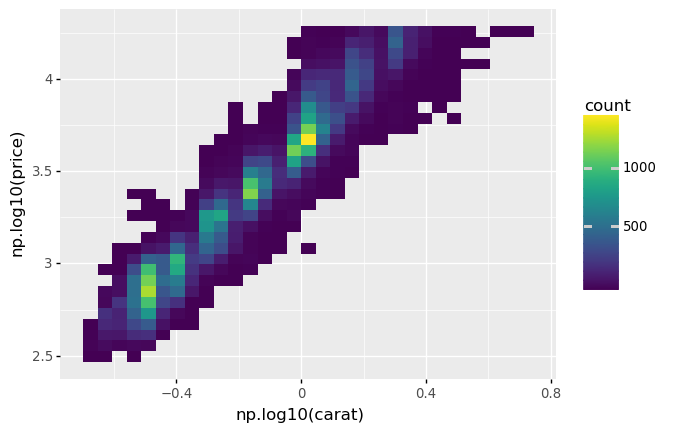

<ggplot: (142641290599)>

In [100]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

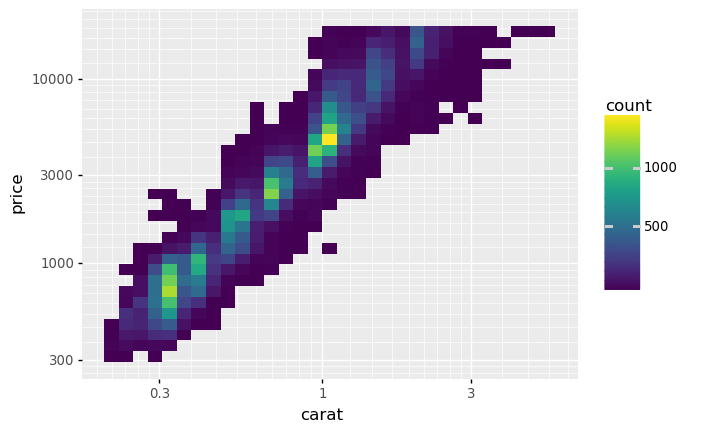

<ggplot: (142641199668)>

In [101]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

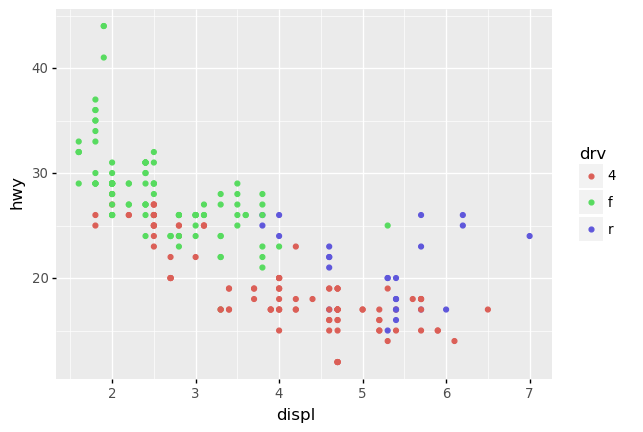

<ggplot: (142641619526)>

In [102]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`

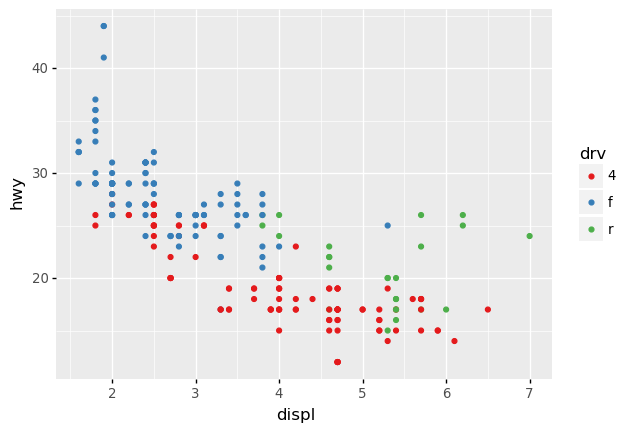

<ggplot: (142642300046)>

In [103]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

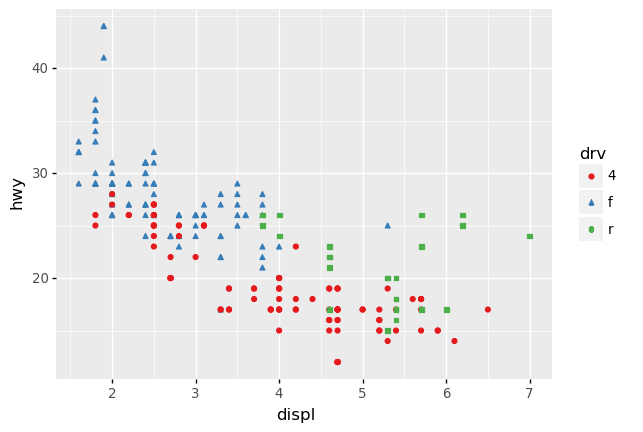

<ggplot: (142641955919)>

In [104]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

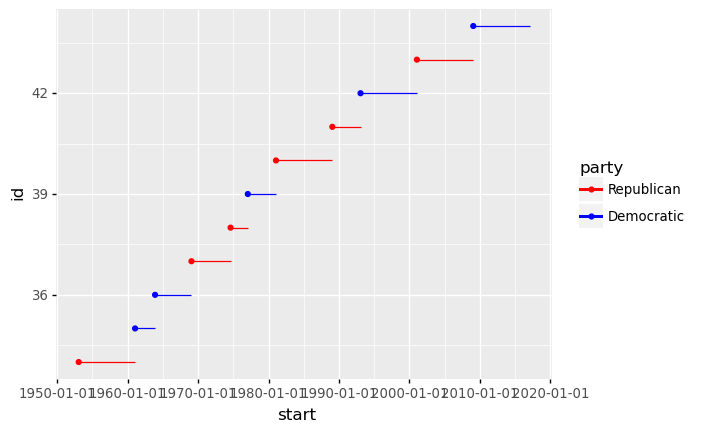

<ggplot: (142641370122)>

In [105]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

In [ ]:
# Type your code here...

## Иногда результат зависит от пределов значений на графике

c:\users\aleksandr_fida\appdata\local\programs\python\python38\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


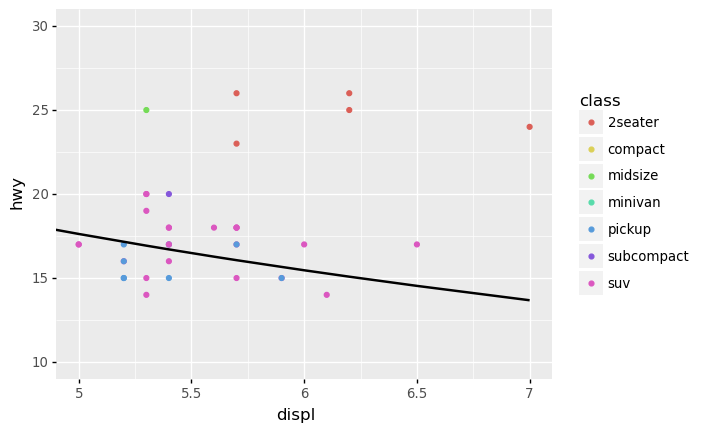

<ggplot: (142641644029)>

In [106]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

c:\users\aleksandr_fida\appdata\local\programs\python\python38\lib\site-packages\plotnine\stats\smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


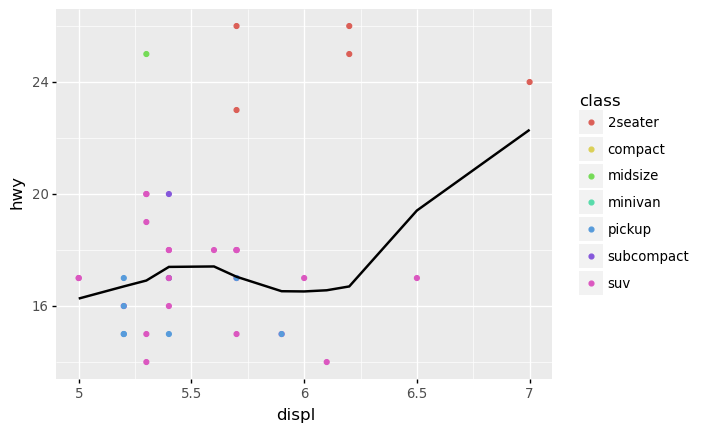

<ggplot: (142641504169)>

In [107]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать макмимальные и минимальные значения на этих осях.

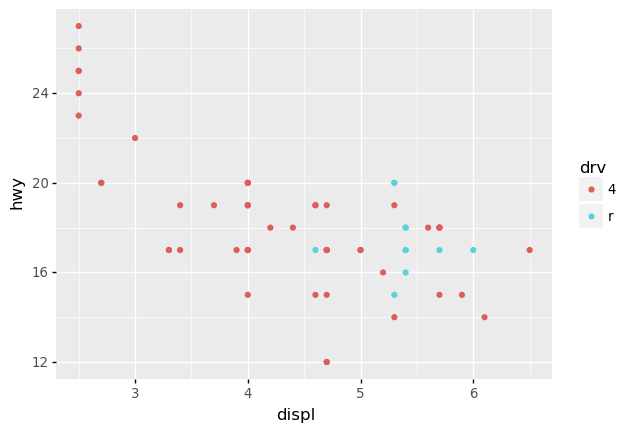

<ggplot: (142641375760)>

In [108]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

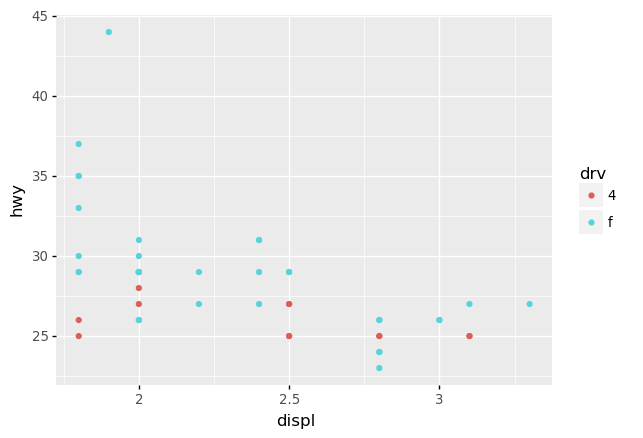

<ggplot: (142640700944)>

In [109]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в одельную переменную.

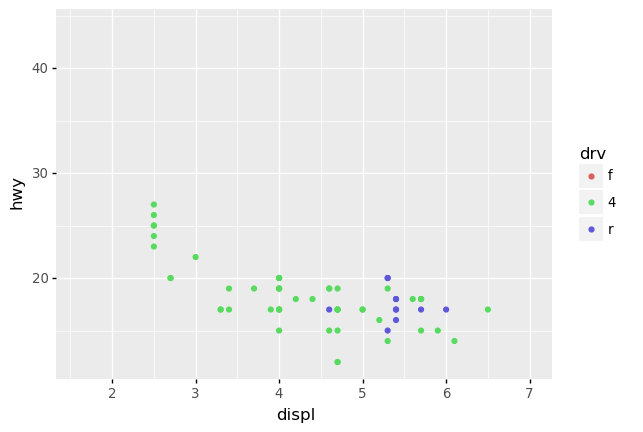

<ggplot: (142646636180)>

In [110]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

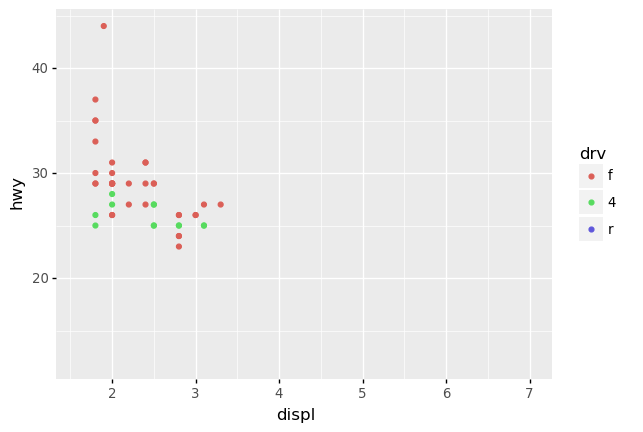

<ggplot: (142642238615)>

In [111]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

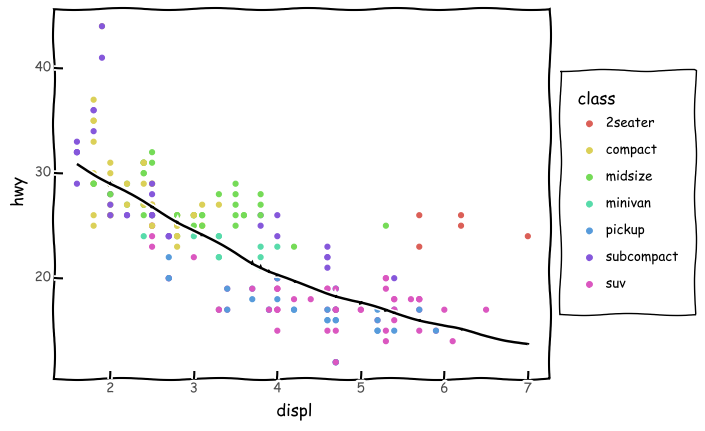

<ggplot: (142641332182)>

In [112]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## 

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`. 

## Если кто-то в предыдущей лабораторной не сделал творческое задание – самое время это сделать. Кто сделал – тот молодец!

Я сделал!